# Band Ratios Plot

This notebook  steps through how different power spectra can give rise to the same ratio value. 

This shows that band ratios are a non-specific measure. As an example case, we use the theta-beta ratio. 

A numerically identically change in theta / beta ratio can be obtained from:

#### Periodic Changes
- a change in theta power
- a change in theta bandwidth
- a change in beta center frequency
- a change in beta power
- a change in beta bandwidth

#### Aperiodic Changes
- a change in aperiodic exponent
    - with or without oscillations present

In [1070]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from fooof import FOOOF
from fooof.sim import gen_power_spectrum
from fooof.plts.spectra import plot_spectrum, plot_spectra, plot_spectrum_shading, plot_spectra_shading

In [1071]:
# Import custom project code
import sys
sys.path.append('../bratios')
from ratios import calc_band_ratio

In [1072]:
# Plot settings
shade_color = '#2e19ff'

In [1073]:
# Band Settings
theta_band = [4, 8]
beta_band = [20, 30]

# Set up index helpers
cf_ind = 0
pw_ind = 1
bw_ind = 2

In [1074]:
# Simulated power spectra settings
freq_range = [1, 35]
freq_res = 0.1
nlv = 0

ap_def = [0, 1]

theta_def = [6, 0.4, 1]
alpha_def = [10, 0.5, 0.75]
beta_def  = [25, 0.3, 1.5]

#def_ap = [0, 1]
#def_osc = [[6, 0.25, 1], [10, 0.4, 0.75] ,[25, 0.2, 1.5]]

In [1075]:
# Create a baseline PSD, with oscillations, to compare to
freqs, ps_base = gen_power_spectrum(freq_range, ap_def, [theta_def, alpha_def, beta_def],
                                    nlv=nlv, freq_res=freq_res)

### Periodic Changes

In [1076]:
## CF
# Change in center frequency - high band
beta_cf = beta_def.copy(); beta_cf[cf_ind] = 19.388
freqs, ps_be_cf = gen_power_spectrum(freq_range, ap_def, [theta_def, alpha_def, beta_cf],
                                     nlv=nlv, freq_res=freq_res)

## PW
# Changes in oscillation power - low band
theta_pw = theta_def.copy(); theta_pw[pw_ind] = 0.5041
freqs, ps_th_pw = gen_power_spectrum(freq_range, ap_def, [theta_pw, alpha_def, beta_def],
                                     nlv=nlv, freq_res=freq_res)
# Changes in oscillation power - high band
beta_pw = beta_def.copy(); beta_pw[pw_ind] = 0.1403
freqs, ps_be_pw = gen_power_spectrum(freq_range, ap_def, [theta_def, alpha_def, beta_pw],
                                     nlv=nlv, freq_res=freq_res)

## BW

# Changes in oscillation bandwidth - low band
theta_bw = theta_def.copy(); theta_bw[bw_ind] = 1.61
freqs, ps_th_bw = gen_power_spectrum(freq_range, ap_def, [theta_bw, alpha_def, beta_def],
                                     nlv=nlv, freq_res=freq_res)
# Changes in oscillation bandwidth - high band
beta_bw = beta_def.copy(); beta_bw[bw_ind] = 0.609
freqs, ps_be_bw = gen_power_spectrum(freq_range, ap_def, [theta_def, alpha_def, beta_bw],
                                     nlv=nlv, freq_res=freq_res)

In [1077]:
# Changes in other band - center frequency
alpha_cf = alpha_def.copy(); alpha_cf[cf_ind] = 8.212
freqs, ps_al_cf = gen_power_spectrum(freq_range, ap_def, [theta_def, alpha_cf, beta_def],
                                     nlv=nlv, freq_res=freq_res)

# Changes in other band - bandwidth
alpha_bw = alpha_def.copy(); alpha_bw[bw_ind] = 1.8845
freqs, ps_al_bw = gen_power_spectrum(freq_range, ap_def, [theta_def, alpha_bw, beta_def],
                                     nlv=nlv, freq_res=freq_res)

In [1078]:
# Collect all the power spectra together
spectra_data = {'Theta Frequency' : None,
                'Theta Power' : ps_th_pw,
                'Theta Bandwidth' : ps_th_bw,
                'Alpha Frequency' : ps_al_cf,
                'Alpha Power' : None,
                'Alpha Bandwidth' : ps_al_bw,
                'Beta Frequency' : ps_be_cf,
                'Beta Power' : ps_be_pw,
                'Beta Bandwidth' : ps_be_bw}

In [1079]:
# Calcualte theta beta ratio of the baseline PSD
base_br = calc_band_ratio(freqs, ps_base, theta_band, beta_band)

In [1080]:
# Calculate delta TBRs
diffreqs = {}
for label, spectra in spectra_data.items():
    if np.all(spectra):
        diffreqs[label] = base_br - calc_band_ratio(freqs, spectra, theta_band, beta_band)

In [1081]:
# Check TBR difference measures from periodic changes
for label, diff in diffreqs.items():
    print('TBR difference from   {:20}   is \t {:1.3f}'.format(label, diff))

TBR difference from   Theta Power            is 	 -1.000
TBR difference from   Theta Bandwidth        is 	 -1.000
TBR difference from   Alpha Frequency        is 	 -1.000
TBR difference from   Alpha Bandwidth        is 	 -1.000
TBR difference from   Beta Frequency         is 	 -1.000
TBR difference from   Beta Power             is 	 -1.000
TBR difference from   Beta Bandwidth         is 	 -1.000


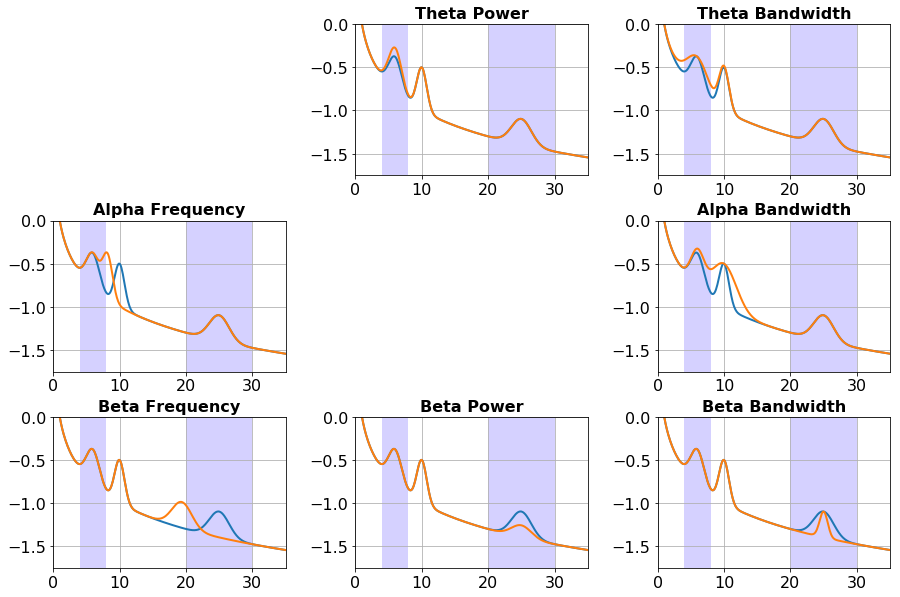

In [1082]:
# Create figure of periodic changes
title_settings = {'fontsize': 16, 'fontweight': 'bold'}
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

for axis, (title, data) in zip(ax.flatten(), spectra_data.items()):
    
    if not np.all(data): continue
    
    plot_spectra_shading(freqs, [ps_base, data], [theta_band, beta_band],
                         shade_colors=shade_color,
                         log_freqs=False, log_powers=True, ax=axis)
    
    axis.set_title(title, **title_settings)
    
    axis.set_xlim([0, 35])
    axis.set_ylim([-1.75, 0])

    axis.xaxis.label.set_visible(False)
    axis.yaxis.label.set_visible(False)
    
# Turn off empty axes
ax[0, 0].axis('off')
ax[1, 1].axis('off')
    
fig.subplots_adjust(hspace=.3)
fig.subplots_adjust(wspace=.3)

#plt.savefig('../figures/OverviewFigs/Periodic-Underdetermined.pdf')

Each panel above plots two PSDs, where the blue curve is the same reference power spectrum plotted in all panels, and the orange is a unique comparison spectrum. 

The difference between TBR from the blue and orange curve is the same (see cell above) across each panel. 

This shows that multiple spectral parameters could change to arrive at identical differences in a ratio measure.

#### Periodic Notes

Note that for a given change (or direction of change) in theta / beta ratio (TBR), there is only one center_frequency change that could do it. 

This is true for the case, as is simulated, in which the 'baseline' spectrum has oscillations entirely within band ranges. In this example, the change is a relative increase in 'theta', and there is no way to increase relative theta with by changing theta CF alone. This is due to the choice of comparison spectrum, and in another scenario, theta CF can also change ratio measures.

### Aperiodic Changes

The same change in ratio can also be driven from changes in aperiodic properties. 

This can happen with or without oscillations even being present.

In [1083]:
# Change in aperiodic exponent
ap_shift = [0.13, 1.1099]
freqs, ps_ap_ex = gen_power_spectrum(freq_range, ap_shift, [theta_def, alpha_def, beta_def],
                                     nlv=nlv, freq_res=freq_res)

In [1084]:
# Use a new base and transformation, without any oscillations
freqs, ps_new_base = gen_power_spectrum(freq_range, ap_def, [],
                                        nlv=nlv, freq_res=freq_res)
ap_shift = [0.13, 1.1417]
freqs, ps_new_apch = gen_power_spectrum(freq_range, ap_shift, [],
                                        nlv=nlv, freq_res=freq_res)

In [1085]:
# Calculate the differences in ratio from baseline spectra
d_ap_osc = base_br - calc_band_ratio(freqs, ps_ap_ex, theta_band, beta_band)
d_ap_no_osc = calc_band_ratio(freqs, ps_new_base, theta_band, beta_band) - \
              calc_band_ratio(freqs, ps_new_apch, theta_band, beta_band)

In [1086]:
# Check TBR difference measures from aperiodic changes
print('TBR difference from  aperiodic exponent with oscillations      is \t {:1.3f}'.format(d_ap_osc))
print('TBR difference from  aperiodic exponent without oscillations   is \t {:1.3f}'.format(d_ap_no_osc))

TBR difference from  aperiodic exponent with oscillations      is 	 -1.000
TBR difference from  aperiodic exponent without oscillations   is 	 -1.000


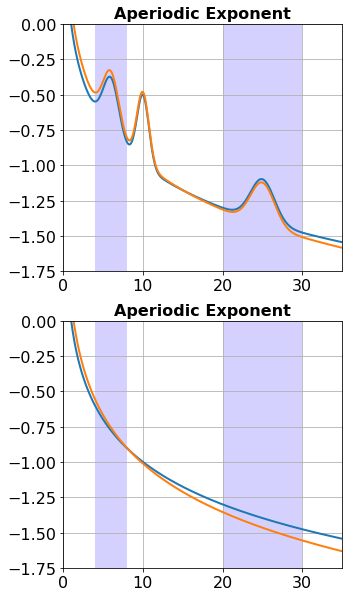

In [1087]:
# Create aperiodic differences figure
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

plot_spectra_shading(freqs, [ps_base, ps_ap_ex], [theta_band, beta_band],
                     shade_colors=shade_color,
                     log_freqs=False, log_powers=True, ax=ax[0])
ax[0].set_title('Aperiodic Exponent', **title_settings)

plot_spectra_shading(freqs, [ps_new_base, ps_new_apch], [theta_band, beta_band],
                     shade_colors=shade_color,
                     log_freqs=False, log_powers=True, ax=ax[1])
ax[1].set_title('Aperiodic Exponent', **title_settings)
    
for axis in ax.flatten():
    
    axis.set_xlim([0, 35])
    axis.set_ylim([-1.75, 0])

    axis.xaxis.label.set_visible(False)
    axis.yaxis.label.set_visible(False)
    
fig.subplots_adjust(wspace=.3)

#plt.savefig('../figures/OverviewFigs/Aperiodic-Underdetermined.pdf')

#### Conclusions

In this example, we have explored changes to measured band ratios by varying different spectral parameters.

Given an observed change in a BandRatio measure, there is no way to tell what has actually changed.

Variations in multiple spectral parameters can lead to the exact same change in ratio measure.

There is no reason to think the change even reflects oscillatory activity, given that aperiodic shifts can drive this effect. 

In this notebook, we simulated variations in one parameter at a time, but in practice, all of these changes could happen together. 

In subsequent notebooks, we will further characterize these findings by simulating changes in each parameter, to estimate how impactful different parameters are to ratio measures, as well as by simulating concurrent changes in multiple parameters, to explore the interaction between changes.

## Same Ratio, Different Spectra

In the above, we plotted XXXX.

We could also do XXXX.